In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [5]:

df = pd.read_csv("/Users/georgepaul/Desktop/bayesian-proposal-1/synthetic-data-apple/static-data/apple_supplier_emissions_static.csv")

# Preview
df.head()
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 Supplier_ID               0
Country                   0
Sector                    0
Renewable_Energy_%        0
Emissions_Scope1_tCO2e    0
Emissions_Scope2_tCO2e    0
Emissions_Scope3_tCO2e    0
Data_Confidence           0
Last_Audit_Year           0
High_Risk_Operations      0
Recycled_Materials_%      0
Emissions_Trend           0
Traceability_Score        0
Risk_Category             0
dtype: int64

Duplicates: 0


In [7]:
print("Shape:", df.shape)
df.info()
df.describe(include='all')

Shape: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Supplier_ID             10000 non-null  object 
 1   Country                 10000 non-null  object 
 2   Sector                  10000 non-null  object 
 3   Renewable_Energy_%      10000 non-null  int64  
 4   Emissions_Scope1_tCO2e  10000 non-null  int64  
 5   Emissions_Scope2_tCO2e  10000 non-null  int64  
 6   Emissions_Scope3_tCO2e  10000 non-null  int64  
 7   Data_Confidence         10000 non-null  float64
 8   Last_Audit_Year         10000 non-null  int64  
 9   High_Risk_Operations    10000 non-null  object 
 10  Recycled_Materials_%    10000 non-null  int64  
 11  Emissions_Trend         10000 non-null  object 
 12  Traceability_Score      10000 non-null  float64
 13  Risk_Category           10000 non-null  object 
dtypes: float64(2), int64

,Supplier_ID,Country,Sector,Renewable_Energy_%,Emissions_Scope1_tCO2e,Emissions_Scope2_tCO2e,Emissions_Scope3_tCO2e,Data_Confidence,Last_Audit_Year,High_Risk_Operations,Recycled_Materials_%,Emissions_Trend,Traceability_Score,Risk_Category
count,10000,10000,10000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000,10000
unique,10000,8,6,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,NaN,3
top,SUP00001,Vietnam,Displays,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Stable,NaN,Medium
freq,1,1311,1724,NaN,NaN,NaN,NaN,NaN,NaN,7567,NaN,5106,NaN,5751
mean,NaN,NaN,NaN,50.299000,369.050700,862.44220,10562.365400,0.798593,2022.001500,NaN,50.047800,NaN,0.791887,NaN
std,NaN,NaN,NaN,29.010718,269.630876,469.22337,4672.972052,0.115521,1.408224,NaN,29.093181,NaN,0.142149,NaN
min,NaN,NaN,NaN,0.000000,30.000000,100.00000,2000.000000,0.600000,2020.000000,NaN,0.000000,NaN,0.310000,NaN
25%,NaN,NaN,NaN,26.000000,99.000000,513.75000,6514.000000,0.700000,2021.000000,NaN,25.000000,NaN,0.690000,NaN
50%,NaN,NaN,NaN,50.000000,345.000000,789.00000,10669.000000,0.800000,2022.000000,NaN,50.000000,NaN,0.795000,NaN
75%,NaN,NaN,NaN,76.000000,560.000000,1167.00000,14089.750000,0.900000,2023.000000,NaN,75.000000,NaN,0.910000,NaN


#### Risk category distribution

/var/folders/7x/hltjgwdn7sjbwj_qq820fkkw0000gn/T/ipykernel_42533/4137235877.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Category', data=df, palette='Set2')


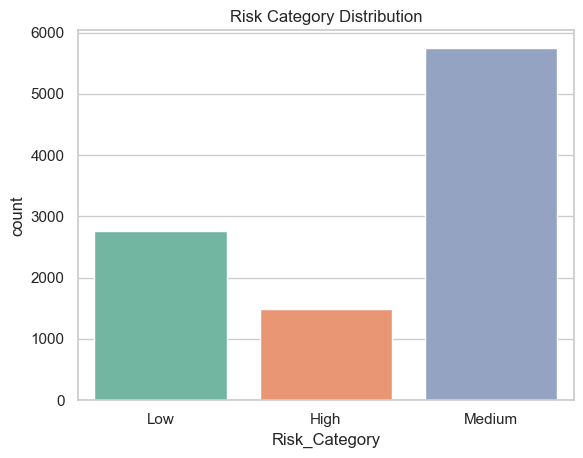

In [8]:
sns.countplot(x='Risk_Category', data=df, palette='Set2')
plt.title("Risk Category Distribution")
plt.show()

#### Correlation heatmap

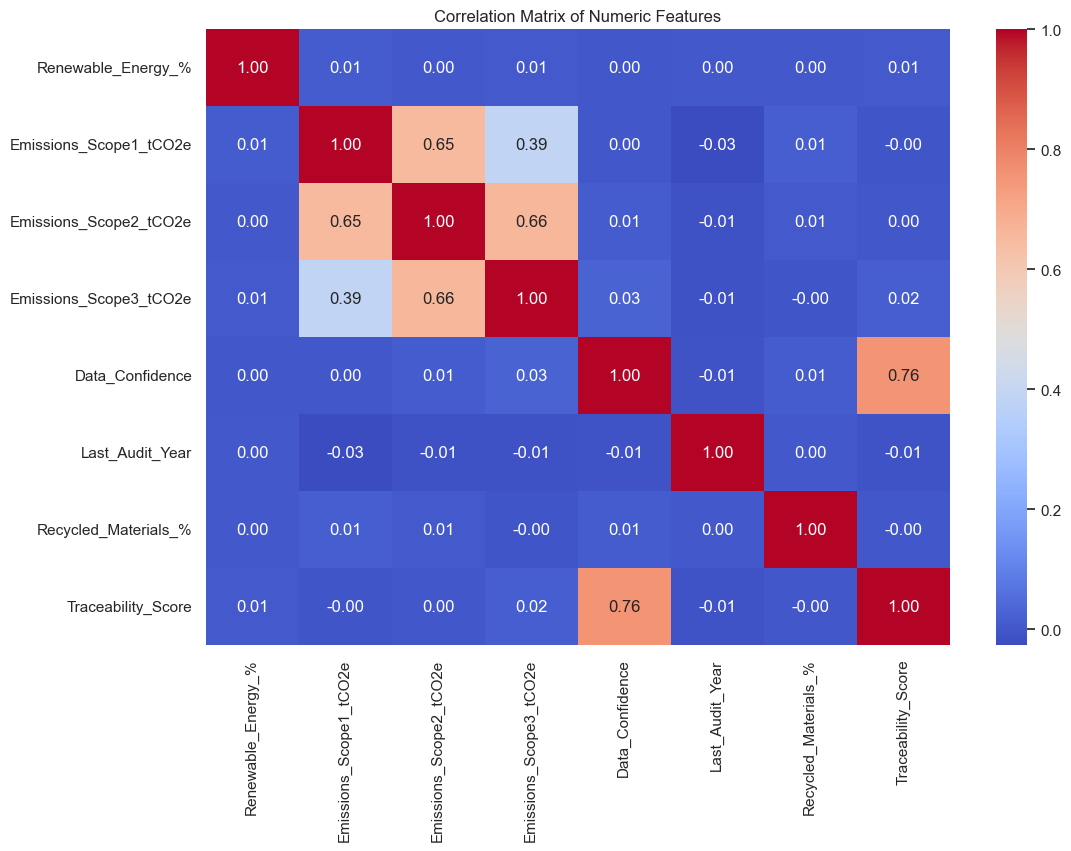

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

#### Renewable energy percent vs Scope 2 emissions

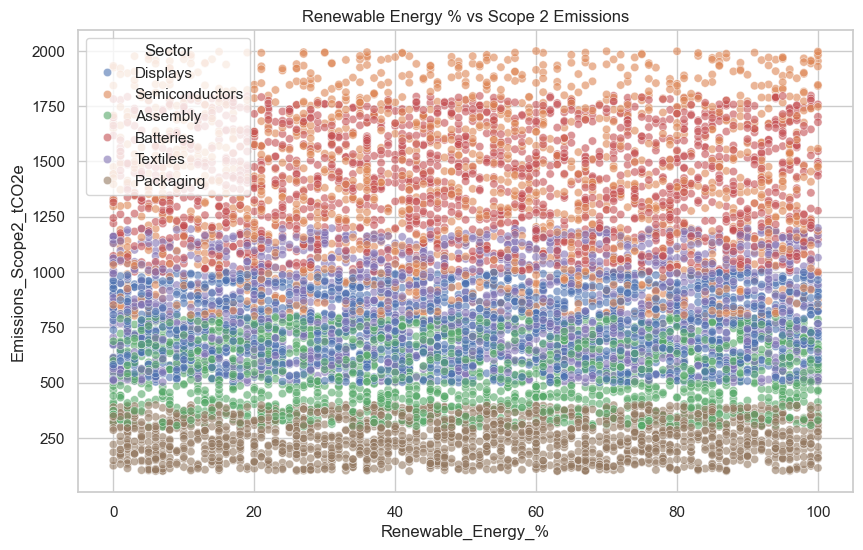

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Renewable_Energy_%', y='Emissions_Scope2_tCO2e', hue='Sector', data=df, alpha=0.6)
plt.title("Renewable Energy % vs Scope 2 Emissions")
plt.grid(True)
plt.show()

#### Average emissions by sector

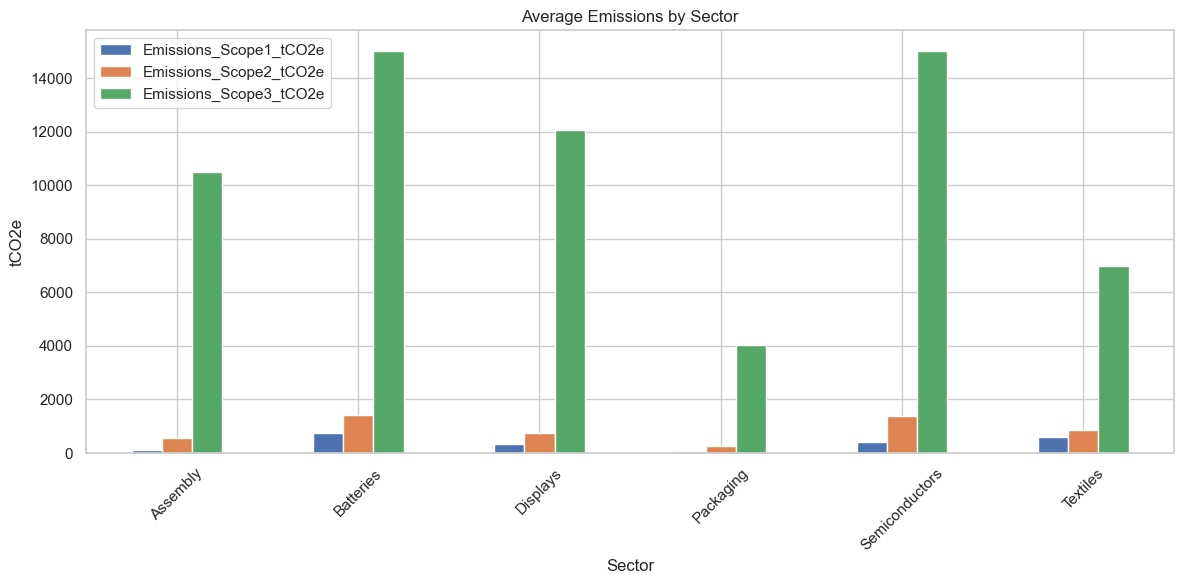

In [12]:
emissions_sector = df.groupby('Sector')[['Emissions_Scope1_tCO2e', 'Emissions_Scope2_tCO2e', 'Emissions_Scope3_tCO2e']].mean()
emissions_sector.plot(kind='bar', figsize=(12, 6))
plt.title("Average Emissions by Sector")
plt.ylabel("tCO2e")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()